In [3]:
from world import World 
import matplotlib.pyplot as plt

## Default Experiment
If we run the factory settings simulation, two "agents of chaos" shoot behaviors at each other and randomly adjust their behavior priors and predictions of the other based on the magnitude of their prediction error, if that error is sufficiently high. As you can see, the error does not decrease reliably over time.

In [4]:
world = World()
world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
time = [t for t in range(len(errors[0]))]
#world.print_results()

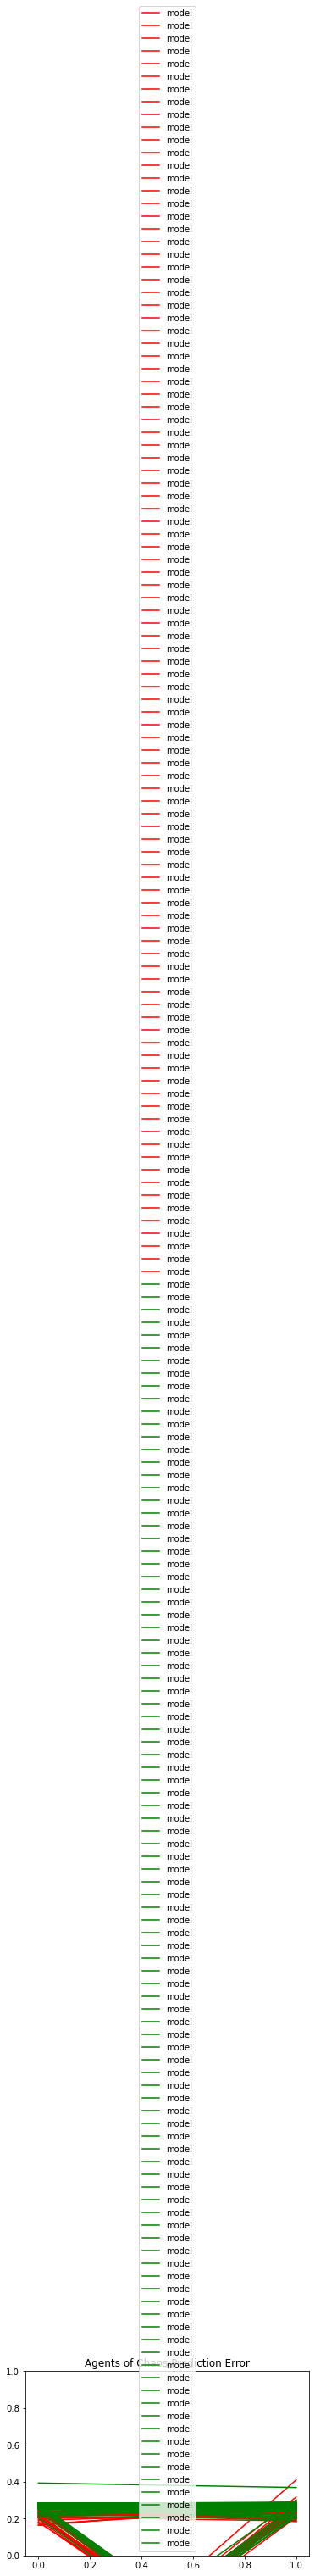

In [5]:
plt.plot(time, errors[0], 'r',label=agents[0])
plt.plot(time, errors[1], 'g', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Agents of Chaos Prediction Error")
plt.show()

## With a Dummy

A dummy agent will keep a constant behavior. The chaotic agent will readjust its prediction as long as it is wrong, but not necessarily in the right direction. Sometimes the chaotic agent will reach the threshold and not adjust, but it is not guaranteed given the short time frame. However, the "averaging" agent, which takes an averaged features of the most recent 4 behaviors received as a benchmark for adjusting predictions, has a better chance at converging on the dummy's static behavior.

In [6]:
d_c_world = World(agent=["chaos","dummy"], seed=[1,2])
d_c_world.create_agents()
d_c_world.run()
agents = d_c_world.get_agents()
errors = d_c_world.get_errors()
preds = d_c_world.get_pred()
priors = d_c_world.get_priors()
time = [t for t in range(len(errors[0]))]

Exception: No valid agents could be found

In [ ]:
plt.plot(time, errors[0], 'r', label=agents[0])
plt.ylim([0, 1])
plt.legend()
plt.title("Agent of Chaos Predicting a Dummy")
plt.show()

In [ ]:
d_a_world = World(agent=["average","dummy"], seed=[3,12], betas=[0.5,0.5])
d_a_world.create_agents()
d_a_world.run()
agents = d_a_world.get_agents()
errors = d_a_world.get_errors()
preds = d_a_world.get_pred()
priors = d_a_world.get_priors()
time = [t for t in range(len(errors[0]))]

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent Predicting a Dummy")
plt.show()

## Pairing an averaging agent with a not-so-chaotic counterpart
Instead of a dummy who has constant behavior, we can set a chaotic agent that has constant priors, but will still draw from the priors to generate variable behavior (within the bounds of those priors). The averaging agent should be able to approximate the priors, but not as easily as when the behavior was fixed.

In [ ]:
c_a_world = World(agent=["average","chaos"], alphas=[0.5,0], betas=[0.5,0.2], seed=[17,115])
c_a_world.create_agents()
c_a_world.run()
agents = c_a_world.get_agents()
errors = c_a_world.get_errors()
preds = c_a_world.get_pred()
priors = c_a_world.get_priors()
time = [t for t in range(len(errors[0]))]
#c_a_world.print_results()

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent + semi-dummy")
plt.show()

## Two Average Joes
We can have two averaging agents try to infer the other's priors.

In [ ]:
a_a_world = World(agent=["average","average"], alphas=[0.5,0.5], betas=[0.2,0.2], seed=[17,150])
a_a_world.create_agents()
a_a_world.run()
agents = a_a_world.get_agents()
errors = a_a_world.get_errors()
preds = a_a_world.get_pred()
priors = a_a_world.get_priors()
time = [t for t in range(len(errors[0]))]
#c_a_world.print_results()

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent x2")
plt.show()

## Reducing Chaos
It still looks a bit messy - what if we reduce the alphas (conformity adjustments)?

In [ ]:
a_a_world = World(agent=["average","average"], alphas=[0.1,0.1], betas=[0.2, 0.2], seed=[17,150])
a_a_world.create_agents()
a_a_world.run()
agents = a_a_world.get_agents()
errors = a_a_world.get_errors()
preds = a_a_world.get_pred()
priors = a_a_world.get_priors()
time = [t for t in range(len(errors[0]))]
#c_a_world.print_results()

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent x2 - less chaos")
plt.show()

## Tracking Past Predictions
Instead of averaging the previous behaviors of others, we can make a prediction by sampling from priors, and then update them by averaging our previous predictions. Reminder: the averaging agent averages the behaviors of others and 

First, we pair a dummy with a prediction averaging agent.

In [ ]:
d_p_world = World(agent=["dummy","prediction"], alphas=[0.3,0.3], betas=[0.3, 0.3], seed=[1,12])
d_p_world.create_agents()
d_p_world.run()
agents = d_p_world.get_agents()
errors = d_p_world.get_errors()
preds = d_p_world.get_pred()
priors = d_p_world.get_priors()
time = [t for t in range(len(errors[0]))]
#d_p_world.print_results()

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Dummy x Prediction Average")
plt.show()

In [ ]:
p_p_world = World(agent=["prediction","prediction"], alphas=[0.3,0.3], betas=[0.3, 0.3], seed=[1,12])
p_p_world.create_agents()
p_p_world.run()
agents = p_p_world.get_agents()
errors = p_p_world.get_errors()
preds = p_p_world.get_pred()
priors = p_p_world.get_priors()
time = [t for t in range(len(errors[0]))]
#p_p_world.print_results()

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Prediction Average x Prediction Average")
plt.show()

# New model

In [ ]:
import numpy as np
np.exp(100)

In [1]:
from world import World 
import matplotlib.pyplot as plt
m_m_world = World(state_size = 4, time = 40, agent=["model", "model"], memory=[1, 1], behav_control=[1, 1], seed=4)
m_m_world.create_agents()
m_m_world.run()
agents = m_m_world.get_agents()
errors = m_m_world.get_errors()
preds = m_m_world.get_pred()
priors = m_m_world.get_behav_priors()
costs = m_m_world.get_costs()

time = [t for t in range(len(costs[0]))]
m_m_world.print_results()

world_pred and world
[0.698 0.216 0.976 0.006]
[0 1 0 1]
dif:
[-0.698  0.784 -0.976  0.994]
sigmoid:
[0.93581756 0.7256288  0.93140964 0.87144471]
prior update:
[0.967 0.547 0.973 0.715]
[0.95140878 0.6363144  0.95220482 0.79322236]
---
world_pred and world
[0.863 0.983 0.164 0.597]
[1 1 1 0]
dif:
[ 0.137  0.017  0.836 -0.597]
sigmoid:
[0.27975531 0.4391827  0.890499   0.11964022]
prior update:
[0.253 0.435 0.779 0.198]
[0.26637765 0.43709135 0.8347495  0.15882011]
---
world_pred and world
[0.61644561 0.29616786 0.95736992 0.01102412]
[0 0 1 1]
dif:
[-0.61644561 -0.29616786  0.04263008  0.98897588]
sigmoid:
[0.91357239 0.5654314  0.95410797 0.91160855]
prior update:
[0.95140878 0.6363144  0.95220482 0.79322236]
[0.62166039 0.40058193 0.6354376  0.56827697]
---
world_pred and world
[0.87070367 0.98314088 0.23778794 0.52308566]
[1 1 1 1]
dif:
[0.12929633 0.01685912 0.76221206 0.47691434]
sigmoid:
[0.29239446 0.44124371 0.91543518 0.23323765]
prior update:
[0.26637765 0.43709135 0.8347495

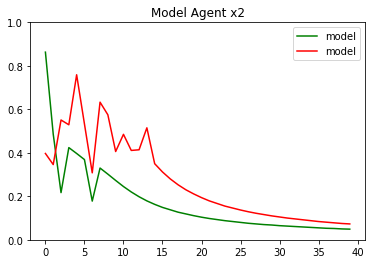

In [2]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Model Agent x2")
plt.show()

In [ ]:
for i in range(1,100):
    print(priors[:,1][i,0])

0.935
0.397
0.353
0.938
0.151
0.158
0.873
0.59
0.918
0.053
0.015
0.343
0.388
0.726
0.65
0.338
0.545
0.204
0.056
0.518
0.373
0.936
0.064
0.32
0.478
0.053
0.909
0.125
0.699
0.844
0.11
0.12
0.163
0.132
0.031
0.126
0.333
0.168
0.832
0.356
0.835
0.945
0.614
0.585
0.994
0.382
0.205
0.818
0.368
0.238
0.346
0.86
0.961
0.222
0.136
0.218
0.975
0.313
0.305
0.729
0.435
0.282
0.889
0.795
0.528
0.816
0.126
0.927
0.751
0.479
0.028
0.845
0.493
0.238
0.887
0.169
0.745
0.375
0.875
0.804
0.174
0.252
0.362
0.064
0.489
0.98
0.35
0.065
0.239
0.213
0.059
0.129
0.472
0.585
0.414
0.507
0.908
0.432
0.195


In [ ]:
for i in range(1,100):
    print(priors[:,1][i,0])

0.935
0.397
0.353
0.938
0.151
0.158
0.873
0.59
0.918
0.053
0.015
0.343
0.388
0.726
0.65
0.338
0.545
0.204
0.056
0.518
0.373
0.936
0.064
0.32
0.478
0.053
0.909
0.125
0.699
0.844
0.11
0.12
0.163
0.132
0.031
0.126
0.333
0.168
0.832
0.356
0.835
0.945
0.614
0.585
0.994
0.382
0.205
0.818
0.368
0.238
0.346
0.86
0.961
0.222
0.136
0.218
0.975
0.313
0.305
0.729
0.435
0.282
0.889
0.795
0.528
0.816
0.126
0.927
0.751
0.479
0.028
0.845
0.493
0.238
0.887
0.169
0.745
0.375
0.875
0.804
0.174
0.252
0.362
0.064
0.489
0.98
0.35
0.065
0.239
0.213
0.059
0.129
0.472
0.585
0.414
0.507
0.908
0.432
0.195


In [ ]:
for i in range(1,100):
    print(priors[:,1][i,0])

0.935
0.397
0.353
0.938
0.151
0.158
0.873
0.59
0.918
0.053
0.015
0.343
0.388
0.726
0.65
0.338
0.545
0.204
0.056
0.518
0.373
0.936
0.064
0.32
0.478
0.053
0.909
0.125
0.699
0.844
0.11
0.12
0.163
0.132
0.031
0.126
0.333
0.168
0.832
0.356
0.835
0.945
0.614
0.585
0.994
0.382
0.205
0.818
0.368
0.238
0.346
0.86
0.961
0.222
0.136
0.218
0.975
0.313
0.305
0.729
0.435
0.282
0.889
0.795
0.528
0.816
0.126
0.927
0.751
0.479
0.028
0.845
0.493
0.238
0.887
0.169
0.745
0.375
0.875
0.804
0.174
0.252
0.362
0.064
0.489
0.98
0.35
0.065
0.239
0.213
0.059
0.129
0.472
0.585
0.414
0.507
0.908
0.432
0.195


In [ ]:
for i in range(1,100):
    print(preds[:,0][i,0])

0.78
0.61
0.309
0.698
0.86
0.625
0.982
0.977
0.167
0.023
0.161
0.923
0.954
0.211
0.361
0.549
0.272
0.461
0.696
0.5
0.716
0.526
0.001
0.395
0.492
0.403
0.354
0.501
0.445
0.09
0.274
0.943
0.027
0.04
0.283
0.582
0.991
0.993
0.993
0.11
0.664
0.524
0.173
0.943
0.242
0.999
0.583
0.183
0.387
0.19
0.411
0.595
0.717
0.487
0.31
0.577
0.442
0.36
0.321
0.208
0.451
0.492
0.899
0.729
0.77
0.375
0.344
0.655
0.711
0.114
0.133
0.456
0.16
0.962
0.838
0.52
0.218
0.135
0.979
0.707
0.86
0.387
0.251
0.299
0.857
0.473
0.663
0.806
0.253
0.08
0.733
0.961
0.954
0.49
0.632
0.733
0.902
0.162
0.406


In [ ]:
preds[:,0][0,1]

0.68524890815873674

In [ ]:
0.68524891

In [ ]:
errors[:,0][0,:]

array([ 0.778     ,  0.68524891, -0.33509081,  0.41700247, -0.39723426,
        0.40197702, -0.40083743,  0.40111115,  0.5989546 ,  0.6454171 ,
        0.65597697,  0.65835609,  0.65889101,  0.65901123,  0.65903824,
        0.65904431,  0.65904567,  0.65904598,  0.65904605,  0.65904606,
        0.65904607,  0.65904607,  0.65904607,  0.65904607,  0.65904607,
        0.65904607,  0.65904607,  0.65904607,  0.65904607,  0.65904607,
        0.65904607,  0.65904607,  0.65904607,  0.65904607,  0.65904607,
        0.65904607,  0.65904607,  0.65904607,  0.65904607,  0.65904607,
        0.65904607,  0.65904607,  0.65904607,  0.65904607,  0.65904607,
        0.65904607,  0.65904607,  0.65904607,  0.65904607,  0.65904607,
        0.65904607,  0.65904607,  0.65904607,  0.65904607,  0.65904607,
        0.65904607,  0.65904607,  0.65904607,  0.65904607,  0.65904607,
       -0.34095393,  0.41557777,  0.60242457,  0.64621081,  0.65615607,
        0.65839638,  0.65890006,  0.65901326,  0.6590387 ,  0.65

In [ ]:
priors[:,0][:,0]

In [ ]:
import numpy as np
np.random.randint

In [ ]:
1 / (1 + np.exp(10))

In [ ]:
np.random.choice([-1,1])

In [ ]:
np.random.uniform(0, 1)